In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

# Task 1

In [2]:
# !curl -O https://raw.githubusercontent.com/Laggg/jupyters-for-ds-students/master/flight_delays.csv

In [3]:
data = pd.read_csv('/Users/alina/Documents/Информатика/6sem/flight_delays.csv', sep=',')
data['Month'] = data['Month'].str[2:].values.astype(int)
data['DayofMonth'] = data['DayofMonth'].str[2:].values.astype(int)
data['DayOfWeek'] = data['DayOfWeek'].str[2:].values.astype(int)

In [4]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,N
99996,1,18,3,804,CO,EWR,DAB,884,N
99997,1,24,2,1901,NW,DTW,IAH,1076,N
99998,4,27,4,1515,MQ,DFW,GGG,140,N


In [5]:
#долю всех задержек ко всем вылетам

len(data[data['dep_delayed_15min'] == 'Y']) / len(data)

0.19044

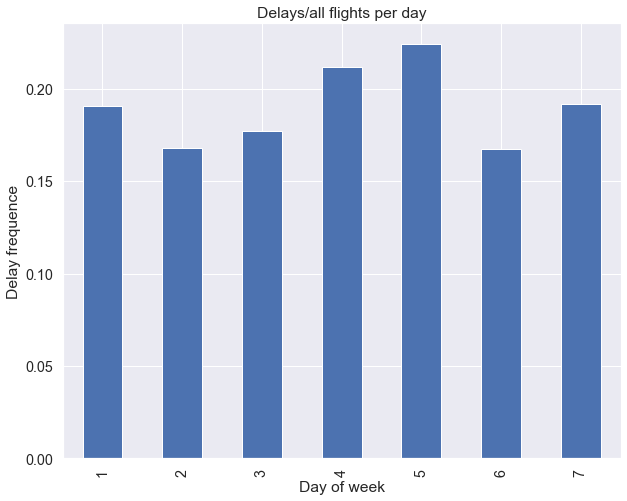

In [17]:
plt.figure(figsize=(10,8))
data['flight_delayed'] = data['dep_delayed_15min'] == 'Y'
delayed = data.groupby('DayOfWeek')['flight_delayed'].sum()
all_flights = data['DayOfWeek'].value_counts().sort_index()
dayofweek = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
per = delayed/all_flights
per.plot.bar(title='Delays/all flights per day', xlabel='Day of week', ylabel='Delay frequence')
plt.show()

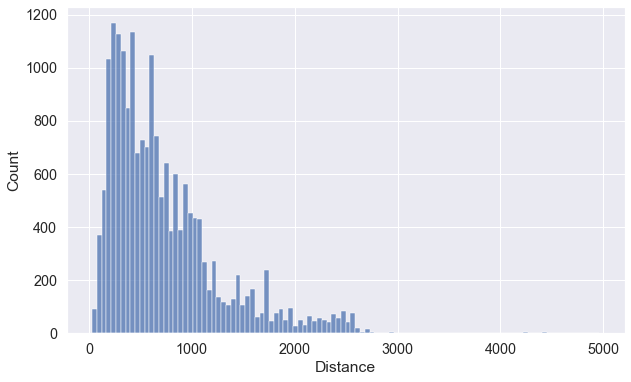

In [18]:
#зависимость количества задержек от длины пути, который предстоит пролететь самолёту

plt.figure(figsize=(10,6))
sns.histplot(data[data['flight_delayed']]['Distance'])
plt.show()

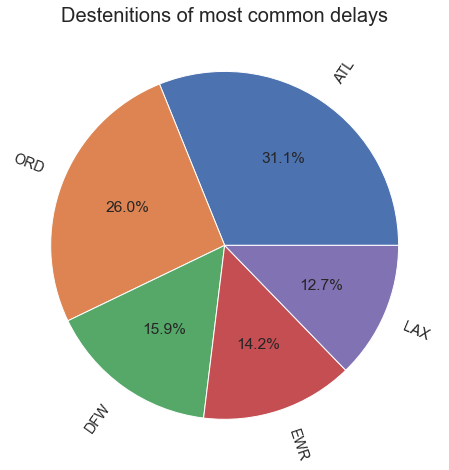

In [19]:
#топ 5 направлений, для которых чаще всего происходят задержки

plt.figure(figsize=(8, 8))
dest = data.groupby('Dest')['flight_delayed'].sum().sort_values(ascending=False)[:5]
dest.index.to_numpy()
plt.title('Destenitions of most common delays', fontsize=20)
plt.pie(dest, labels=dest.index.to_numpy(), autopct='%1.1f%%', rotatelabels=True)

plt.show()

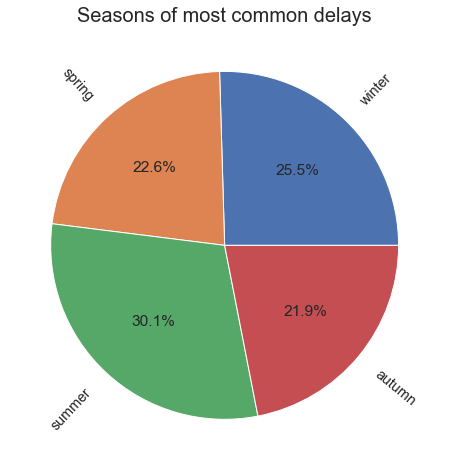

In [20]:
#в какие времена года чаще всего происходят задержки рейсов

plt.figure(figsize=(8, 8))
dest = data.groupby('Month')['flight_delayed'].sum().sort_index(ascending=True)
df = pd.DataFrame({
    'seasons': ['winter', 'spring', 'summer', 'autumn'],
    'delays': [dest.values[0]+dest.values[1]+dest.values[11], dest.values[2:5].sum(), dest.values[5:8].sum(),
              dest.values[8:11].sum()],
})
df

dest.index.to_numpy()
plt.title('Seasons of most common delays', fontsize=20)
plt.pie(df['delays'], labels=df['seasons'], autopct='%1.1f%%', rotatelabels=True)

plt.show()

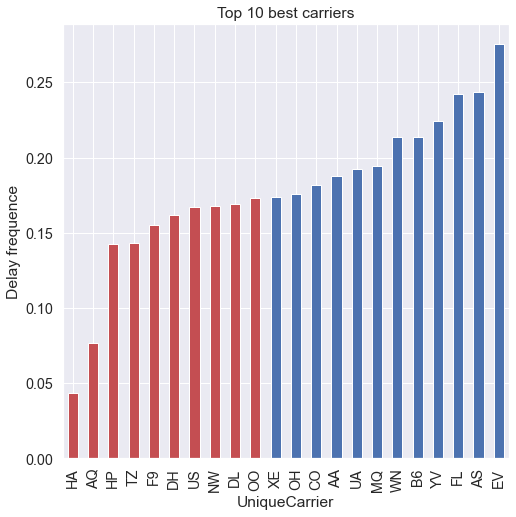

In [21]:
#топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

plt.figure(figsize=(8, 8))
df = data.groupby('UniqueCarrier')['flight_delayed']
per_for_carrier = df.sum() / df.size()

per_for_carrier.sort_values().plot.bar(title='Top 10 best carriers', ylabel='Delay frequence', 
                                       color=(['r']*10+['b']*100))
plt.show()

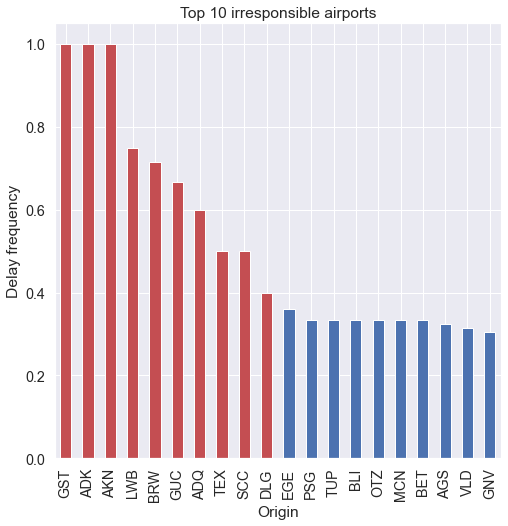

In [22]:
#топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

plt.figure(figsize=(8, 8))
df = data.groupby('Origin')['flight_delayed']
per_for_airport = df.sum() / df.size()
per_for_airport.sort_values(ascending=False)[:20].plot.bar(title='Top 10 irresponsible airports', 
                                                            ylabel='Delay frequency', color=(['r']*10+['b']*10))
plt.show()

# Task 6

<IPython.core.display.Javascript object>


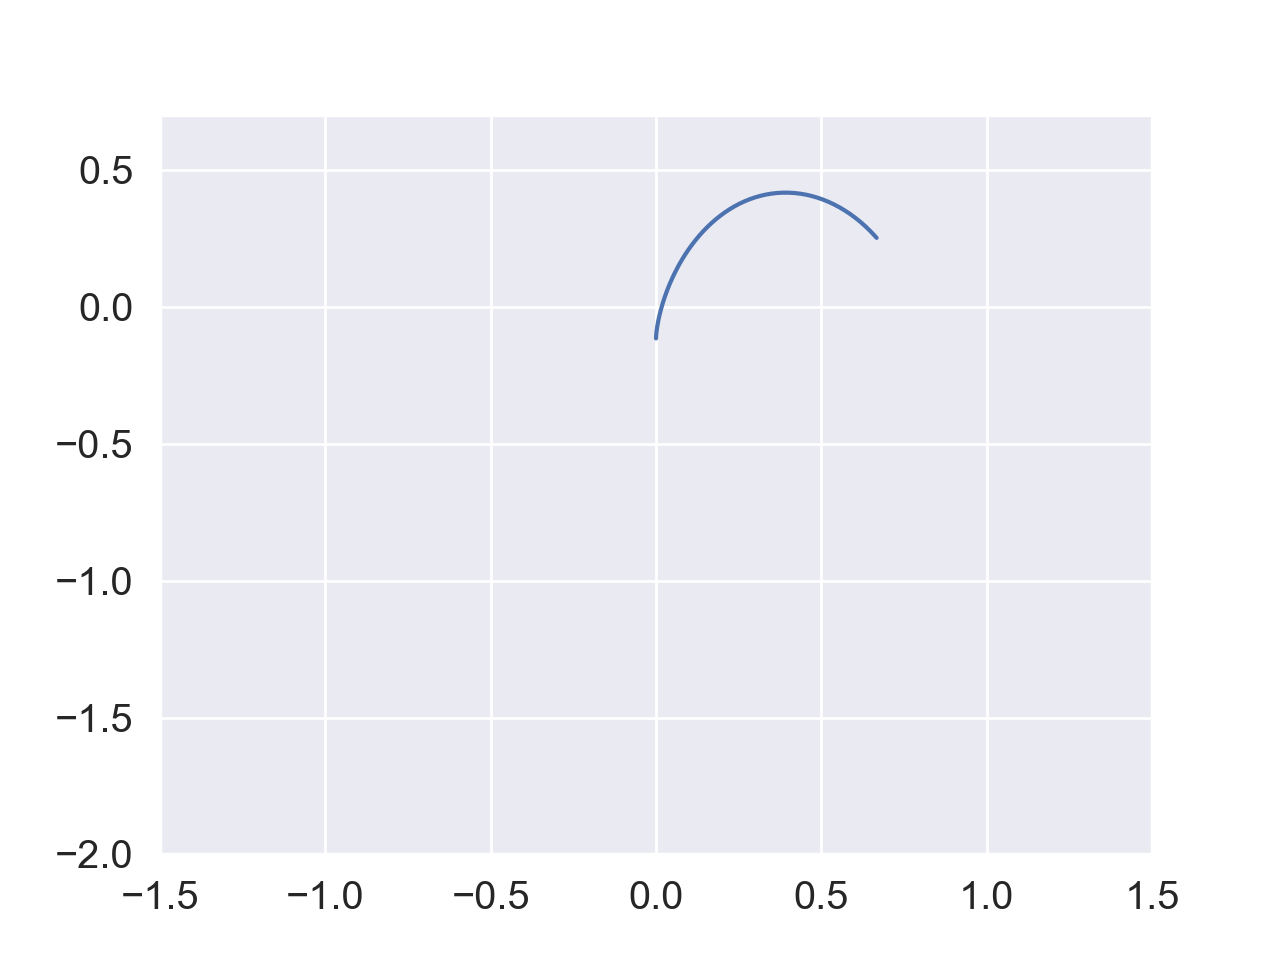

In [26]:
%matplotlib notebook
from matplotlib import animation

t = np.linspace(0, 2 * np.pi, 1000)
x = ( 16 * (np.sin(t) ** 3) ) / 20
y = ( 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t) )/13 - 0.5

fig, ax = plt.subplots()
ax.axis([-1.5, 1.5, -2, 0.7])
l, = ax.plot([], [])

def animate(i):
    l.set_data(x[:i], y[:i])
    
fps = 30 # frame per sec

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100.0 / fps)
plt.show()